# **Optimizing Airbnb Pricing and Revenue**
# By: Sultan Sulaiman Said



## Case Study

We are an Airbnb host in Bangkok and we would like to optimize our pricing strategy to maximize revenue.

In order to achieve said objective, we are faced with these questions regarding the current airbnb market in our city. 


- How does the price of listings in different neighborhoods and room types compare to each other?
- Could we identify any seasonal or event-related pricing patterns that can be leveraged to increase revenue?
- Are there any specific features for which guests are willing to pay a premium?
- Can we adjust the minimum night requirement dynamically to maximize occupancy without sacrificing revenue?




## Business Question:

There are a few business questions that can be explored to assist our case study mentioned above. 

- How does the listing price vary based on factors such as room type, neighborhood, and availability?
- Can you identify any seasonal patterns in pricing and adjust rates accordingly to maximize revenue?
- Are there specific features that significantly impact the price of listings?

## Data

The data being analyzed is available publicly on Kaggle, namely [Airbnb Listings Bangkok](https://www.kaggle.com/datasets/minemartin/bangkok-airbnb-listings). The data is stored with a csv format.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import folium
from folium.plugins import MarkerCluster

import warnings
warnings.filterwarnings("ignore")

Below are the 5 first and last rows of the dataset.

In [45]:
df1 = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df1.head(),df1.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


As shown above, these are the descriptions of the data columns within this dataset. 

- **Unnamed 0** : Index (can be deleted.)
- **id**: Unique number identifier for certain lodging listings.
- **name**: Name of listing as registered in the airbnb database.
- **host_id**: Unique number identifier for hosts.
- **host_name**: Name of host that corresponds to host_id
- **neighborhood**: Neighborhood location for the corresponding listings.
- **latitude/longitude**: Exact location of the accomodation that can be displayed on a map.
- **room_type**: Type of accomodation.
- **price**: Daily rental price of the listed accomodation.
- **minimum_nights**: Shortest rental duration (measured in nights).
- **number_of_reviews**: Total number of reviews per listing.
- **last_review**: Latest date at which the place was reviewed.
- **reviews_per_month**: Average number of reviews per month.
- **calculated_host_listings_count**: Total number of places listed by an unique host in the city.
- **availability_365**: Number of days that the place is available for booking in a year.
- **number_of_reviews_ltm**: Total number of reviews of a certain place per year.



In [46]:
df = df1.drop(columns = ["Unnamed: 0"])
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Data Understanding and Cleaning

Before starting the analysis, we would like to study the dataset further and clean the dataset of any missing values. For the first step, we will examine the parameters and measure of spread for the whole dataset. 

In [47]:
print(f'The number of rows and columns in this dataset are: {df.shape}')
df.info()

The number of rows and columns in this dataset are: (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                  

Statistik Deskriptif Dataset:

In [48]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


Presence of duplicated data

In [49]:
df.duplicated().sum()

np.int64(0)

There are no data duplicates in this dataset.

Unique data per column

In [50]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

Here are the findings that we managed to glean from the summary above:

- There are 15854 rows dan 16 columns in this dataset.
- **name**, **host_name**, **last_review**, **reviews_per_month** columns has missing values. This can be observed from the column having less than 15854 non-null counts.
- The **last_review** data column has an object data type. This can be converted to the datetime data type, as the data presented is a review date.
- Minimum **price** displayed on the table is 0. This does not make sense, as no one would rent their place for free. This can be considered as a missing value.
- **minimum_nights** has a maximum value of 1125. This indicates an outlier. 
- The rest of the data columns have the correct data types and has no missing values.

## Missing and Anomalous Values

Let us examine the missing and anomalous values present in the dataset further. 

In [51]:
df.isna().sum()

id                                0   
name                              8   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [52]:
# Persentase missing values per kolom:
df.isna().sum()/df.shape[0]*100

id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

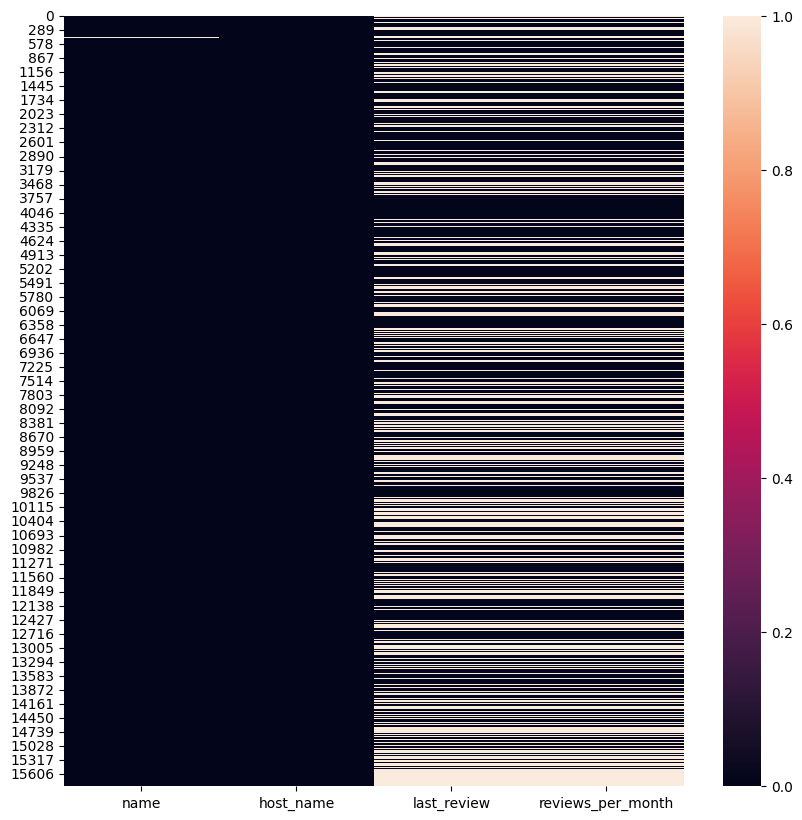

In [53]:
# Visualization of missing data:
plt.figure(figsize=(10,10))
sns.heatmap(df[['name', 'host_name', 'last_review', 'reviews_per_month']].isna())

As shown on the heatmap above, there are numerous missing values for last_review and reviews_per_month, which is exactly equal to each other both in quantity (36.52%) and index number (both missing values are located in the same rows). 

This is the result of customers not leaving any reviews for the accomodation after booking.

There is exactly one missing value for host_name, which is not directly visible in the figure. However, the missing name values are grouped closely.
For the sake of consistency, we will replace all missing values for name and host_name as "unknown". 


In [54]:
df["name"].fillna("Unknown", inplace=True)
df["host_name"].fillna("Unknown", inplace=True)
df[["name", "host_name"]].isna().sum()

name         0
host_name    0
dtype: int64

Let us now examine the values with no reviews again. Below are the aformentioned listings.

In [55]:
df[(df["last_review"].isna()) & (df["reviews_per_month"].isna())]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


As shown in the table above, the number of reviews for every NaN review value is 0. This makes logical sense, as there are no review data present for those rows. To counteract this, we will assign the reviews per month as 0 and last_review as the default date. In addition, the last_review column will be converted to the datetime format as mentioned before. 

In [56]:
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")
df["last_review"].fillna(pd.to_datetime("1900-01-01"), inplace=True)
df["reviews_per_month"].fillna(0, inplace=True)

In [57]:
df.isna().sum()
#All the missing values have been cleaned

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Let us now examine the other anomalous values present in the dataset. 

Firstly, one of the price points is set as 0. We will identify which index this belongs to.

In [58]:
df[df["price"] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,1900-01-01,0.0,1,0,0


This data point(index 11103) is not valid for our analysis, therefore it will be removed from the table.

In [59]:
df.drop(index=11103, inplace=True)

We have managed to remove every missing values from the table and cleaned the unusual price data. In the final step of the data cleaning process, we will remove both id and host_id from the table. This step is neccesary is because both columns have no relevance to the analysis that we are about to perform. The index number at the leftmost column is enough to classify the data. 

In [60]:
df.drop(columns=["id", "host_id"], inplace=True)
df.head().tail()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1900-01-01,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1900-01-01,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1900-01-01,0.00,3,365,0


## Exploratory Data Analysis

For our next step, we will examine the distribution of different variables present in the dataset. Among the colums listed above, **latitude**, **longitude**, **price** **minimum_nights**, **number_of_reviews**, **reviews_per_month**, **calculated_host_listings_count** are considered numerical data. These data can be plotted to observe how it is distributed. Moreover, it will be advantageous to test whether the data is distributed normally or not. 

The data distribution will be displayed using histogram.

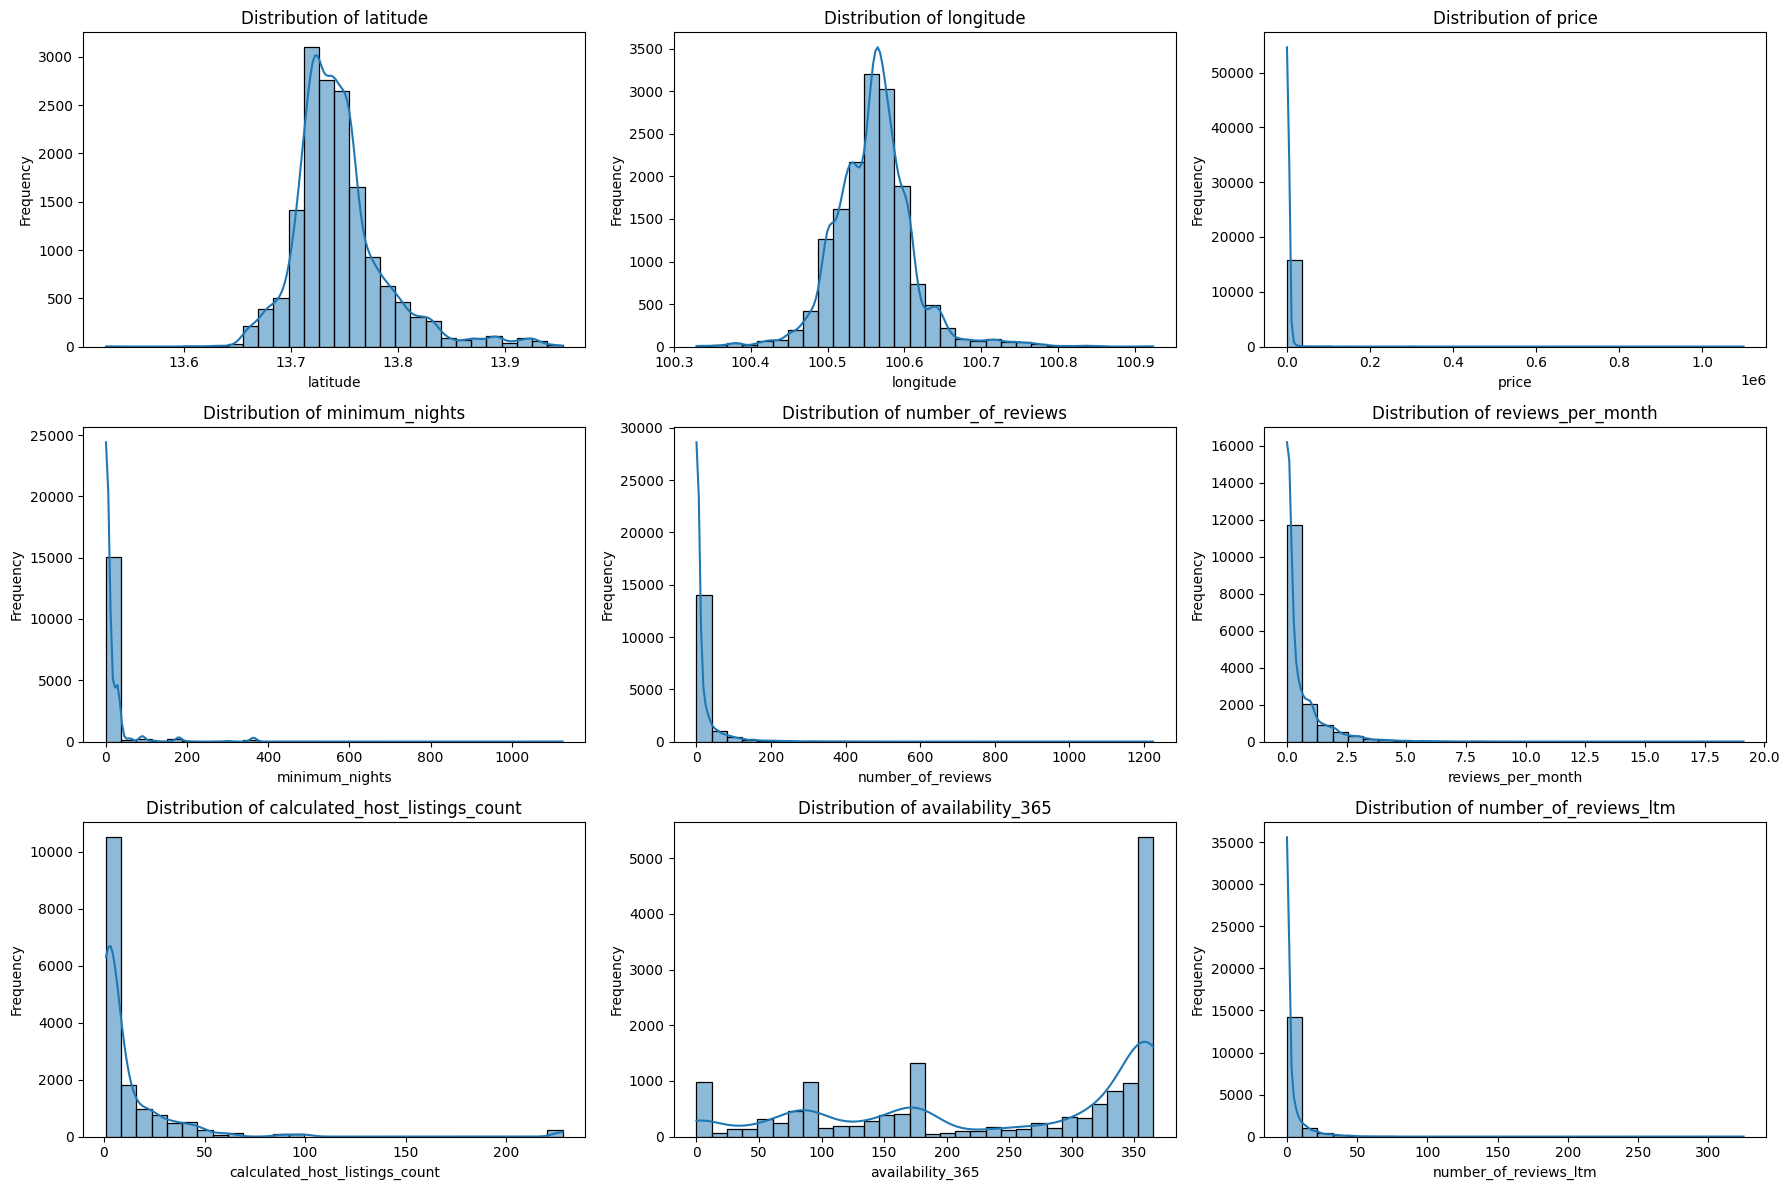

In [61]:
#Store Numerical Columns
numerical_cols= [
    "latitude",
    "longitude",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "number_of_reviews_ltm"
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

At a glance, only the latitude/longitude data follows a seemingly normal distribution. If we were to be sure, however, we must conduct normality tests on each and every variable above. The listed accomodations are located within Bangkok, hence the latitudes/longitudes are not too far from each other. 

The distribution of annual room availability shows an interesting pattern in the graphic above. There are peaks in the data at 60 days, 90 days and 180 days, which indicates some accomodations opening on a 2/3/6 month basis. 
The rest of the data mostly exhibits a right-skew pattern, heavily collected on the lower side. 

In [62]:
normality_results = []

for col in numerical_cols:
    stat, p_value = normaltest(df[col].dropna())
    
    normality_results.append({
        "Variable": col,
        "Statistic": stat,
        "p_value": p_value,
        "Normality": "Normal" if p_value > 0.05 else "Not Normal"
    })

normality_df = pd.DataFrame(normality_results)
normality_df

,Variable,Statistic,p_value,Normality
0,latitude,4356.959559,0.0,Not Normal
1,longitude,2077.433462,0.0,Not Normal
2,price,43046.717756,0.0,Not Normal
3,minimum_nights,22190.129178,0.0,Not Normal
4,number_of_reviews,19163.172470,0.0,Not Normal
5,reviews_per_month,15621.035696,0.0,Not Normal
6,calculated_host_listings_count,16474.501173,0.0,Not Normal
7,availability_365,12885.350519,0.0,Not Normal
8,number_of_reviews_ltm,24895.698981,0.0,Not Normal


As shown in the test above, none of the variables are normally distributed. The next step in the analysis is to examine the outliers present in the data. For this end, we require the boxplot for each variable. 

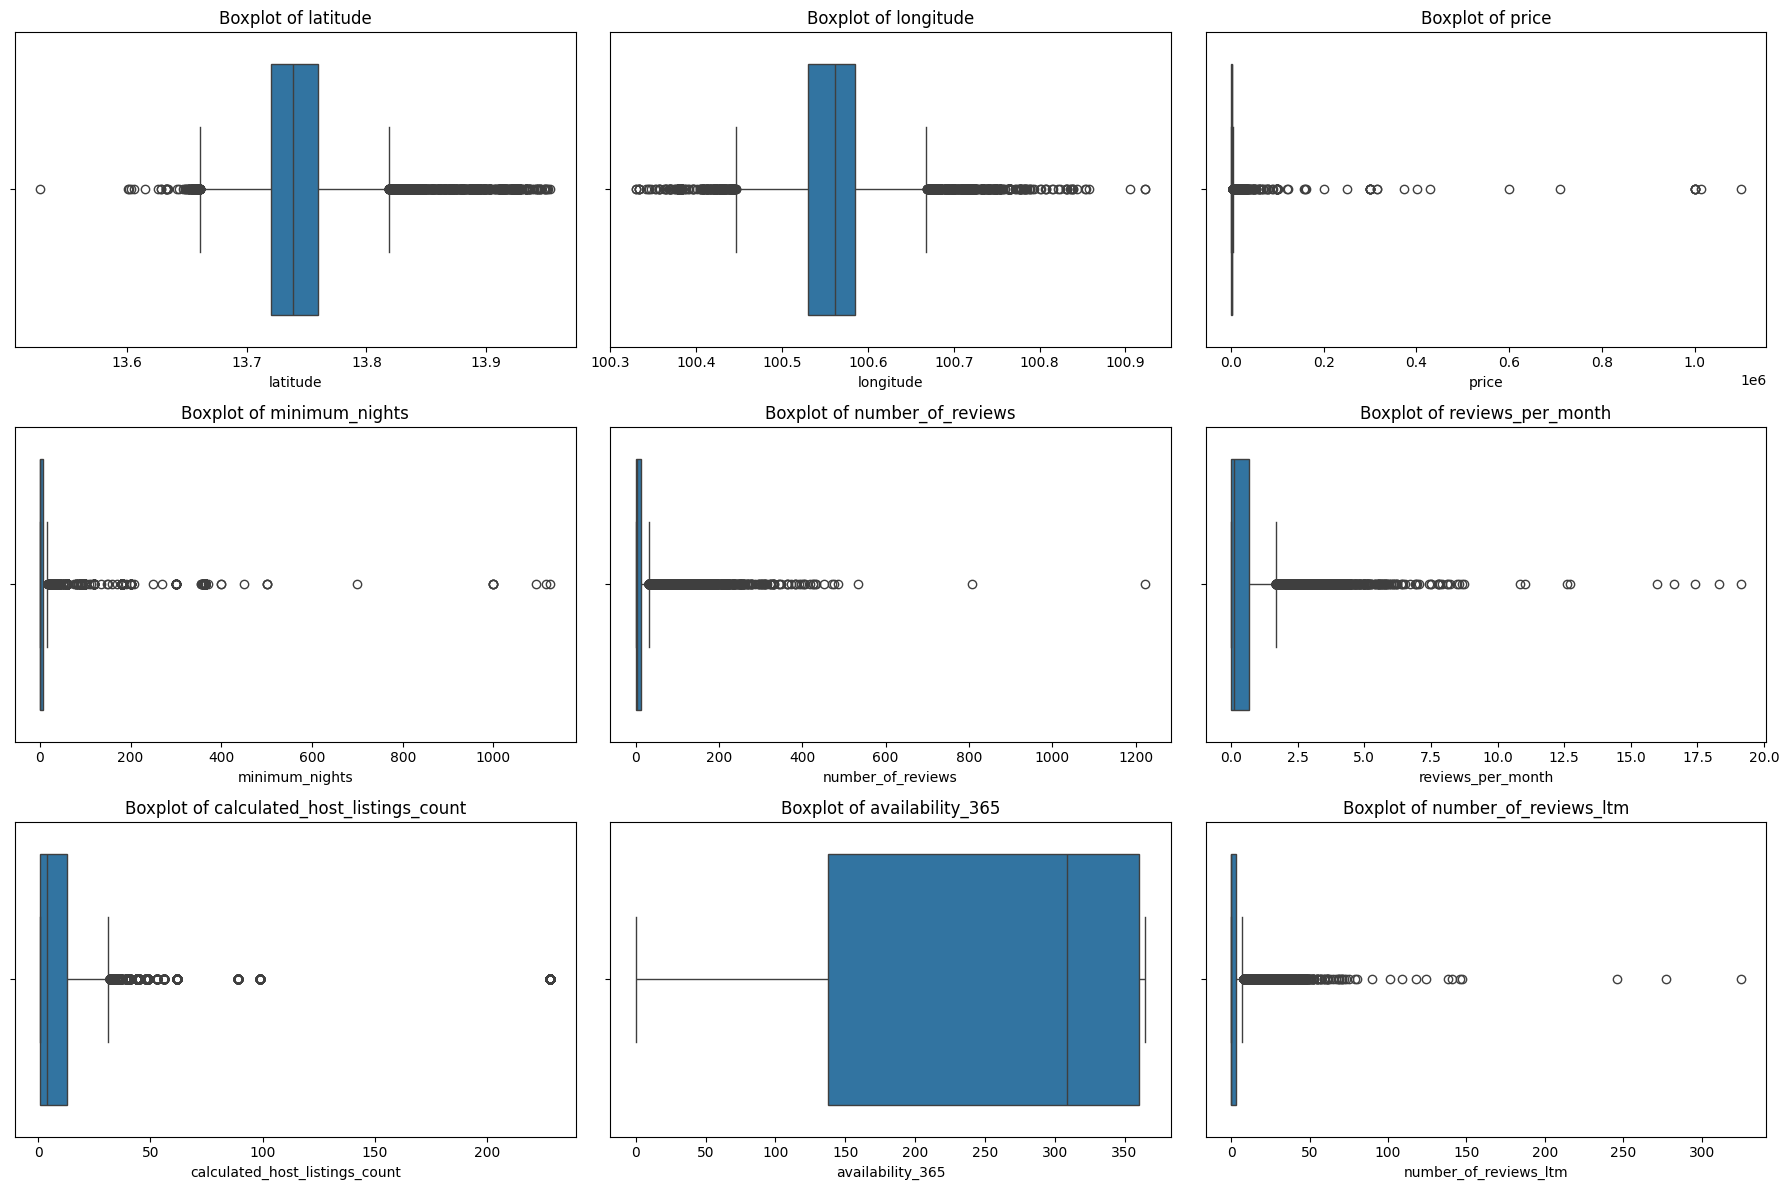

In [63]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

As shown in the boxplot above, the data skews greatly to the right for most of the variables. These variables show a high number of outliers in the boxplot.  In contrast, the annual availability column, the data skews toward the right. 

How many outliers are present in the variables listed above?

In [64]:
outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    outlier_summary.append({
        "Variable": col,
        "Outlier_Count": outlier_count,
        "Outlier_Percentage (%)": round(outlier_count / len(df) * 100, 2),
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,Variable,Outlier_Count,Outlier_Percentage (%),Lower Bound,Upper Bound
0,latitude,1094,6.90,13.660975,13.818615
1,longitude,602,3.80,100.446500,100.668340
2,price,1403,8.85,-1393.500000,4722.500000
3,minimum_nights,3168,19.98,-8.000000,16.000000
4,number_of_reviews,2240,14.13,-19.500000,32.500000
5,reviews_per_month,1471,9.28,-1.005000,1.675000
6,calculated_host_listings_count,1832,11.56,-17.000000,31.000000
7,availability_365,0,0.00,-195.000000,693.000000
8,number_of_reviews_ltm,2219,14.00,-4.500000,7.500000


As seen in the table above, **price**, **minimum_nights** and all review-related variables has a high outlier percentage, standing at above 8.8% of total data counts. This indicates high variance in the data. 

## Data Analysis

We have successfully performed data cleaning and data distribution and normality analysis on the Bangkok Airbnb Listing dataset. Now, we will proceed to answer the questions posed at the beginning of this documentation. 

Since our business questions also overlap with our initial case study requirements, we will combine them into these questions, which we will address individually: 

1) How does the price of listings in different neighborhoods and room types compare to each other?

2) Are there any identifiable seasonal or event-related pricing patterns that can be leveraged to increase revenue?

3) Can we adjust the minimum night requirement dynamically to maximize occupancy without sacrificing revenue?

4) Are there any specific features for which guests are willing to pay a premium?



### **Section 1. How does the price of listings in different neighborhoods and room types compare to each other?**

In order to analyze the differences in prices per neighborhood, there are a few neccesary steps that we need to do. We need to calculate the median price of listings per neighborhood, then create a geospatial map of the price distribution per neighborhood using Folium. Median is used here as our parameter because the price points are not distributed normally. In addition, we will also display the number of listings for each room type per neighborhood to check its distribution.

In [65]:
#Calculate the Median listing price per neighborhood and room type breakdown

neighbourhood_stats = (
    df.groupby("neighbourhood")
    .agg(
        median_price=("price", "median"),
        total_listings=("price", "count"),
        latitude=("latitude", "mean"),
        longitude=("longitude", "mean")
    )
    .reset_index()
)

roomtype_breakdown = (
    df.groupby(["neighbourhood", "room_type"])
    .size()
    .reset_index(name="count")
)

roomtype_dict = {}
for _, row in roomtype_breakdown.iterrows():
    roomtype_dict.setdefault(row["neighbourhood"], {})[row["room_type"]] = row["count"]

Let us now display the results on a map. 

In [66]:
m = folium.Map(
    location=[13.7563, 100.5018],
    zoom_start=11,
    tiles="cartodbpositron"
)

for _, row in neighbourhood_stats.iterrows():

   
    if row["median_price"] < 1000:
        color = "green"
    elif row["median_price"] < 2500:
        color = "orange"
    else:
        color = "red"

    
    breakdown = roomtype_dict.get(row["neighbourhood"], {})
    roomtype_html = "".join(
        [f"{k}: {v}<br>" for k, v in breakdown.items()]
    )

    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["median_price"] / 300,  
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"""
        <b>Neighbourhood:</b> {row['neighbourhood']}<br>
        <b>Median Price:</b> ฿{row['median_price']:.0f}<br>
        <b>Total Listings:</b> {row['total_listings']}<br><br>
        <b>Types of Accommodation:</b><br>
        {roomtype_html}
        """
    ).add_to(m)

In [67]:
m

There are a few insights that can be concluded from the map above.  

- The price of accomodation listings are higher on neighborhoods closer to the city center. This may imply that the potential profits are higher if we were to list an accomodation closer to the center. This may be attributed to the higher demand for accomodation.

- However, the density of accomodation is within those areas as well. Competition is going to be tougher if we were to open an accomodation closer to the city center. 

- Most of the listed accomodations are entire houses/apartments, with private rooms being the second. There are also hotel rooms and shared rooms in the high-density areas. Almost all hotel rooms and shared rooms are located in high-density areas too, with barely any listings in the lower density areas. 

- Areas with a higher median tend to have a higher proportion of entire homes/apartments. Areas with a lower median tend to have a higher private room ratio.

To illustrate the points above, we will create another graph that highlights the relationship between room type, neighborhood and price. 

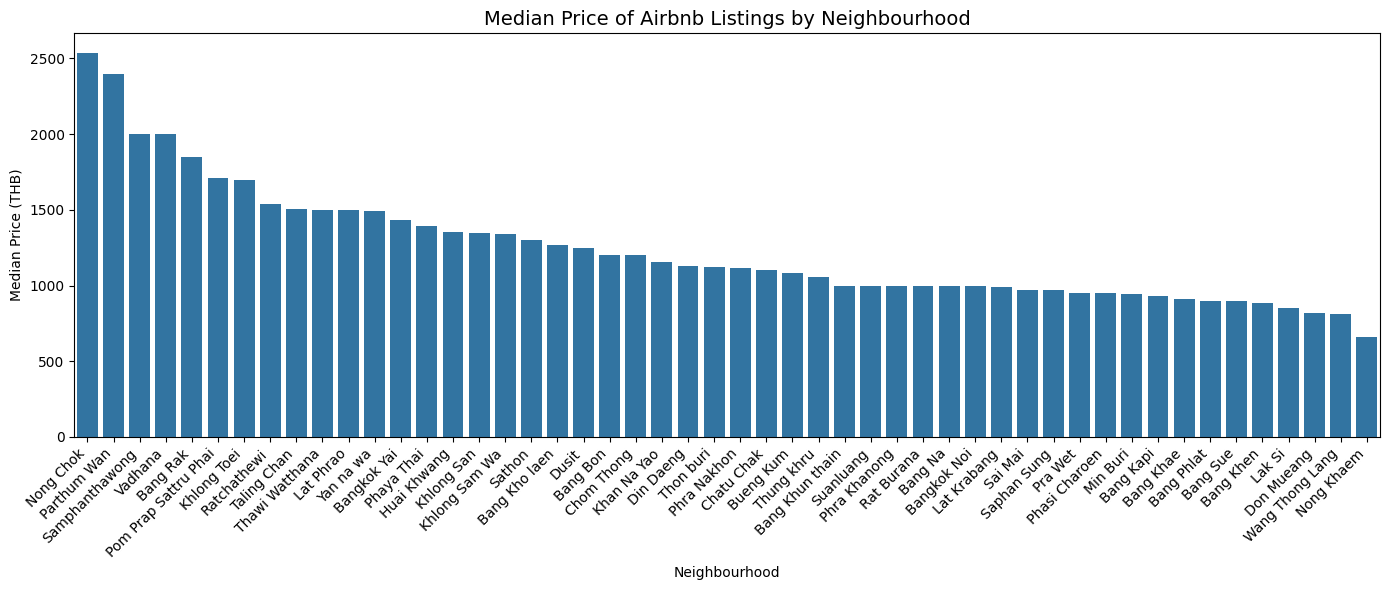

In [68]:
neighbourhood_price = (
    df.groupby("neighbourhood")["price"]
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=neighbourhood_price,
    x="neighbourhood",
    y="price"
)

plt.title("Median Price of Airbnb Listings by Neighbourhood", fontsize=14)
plt.xlabel("Neighbourhood")
plt.ylabel("Median Price (THB)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Above is the median price of each neighborhood, sorted from the highest to the lowest. The data displayed here is in agreement with the map above, from which we managed to conclude that areas closer to the city centre tend to be more expensive than the ones further from it. To derive more insights from the data, we need to also plot the distribution of room types per neighborhood. 

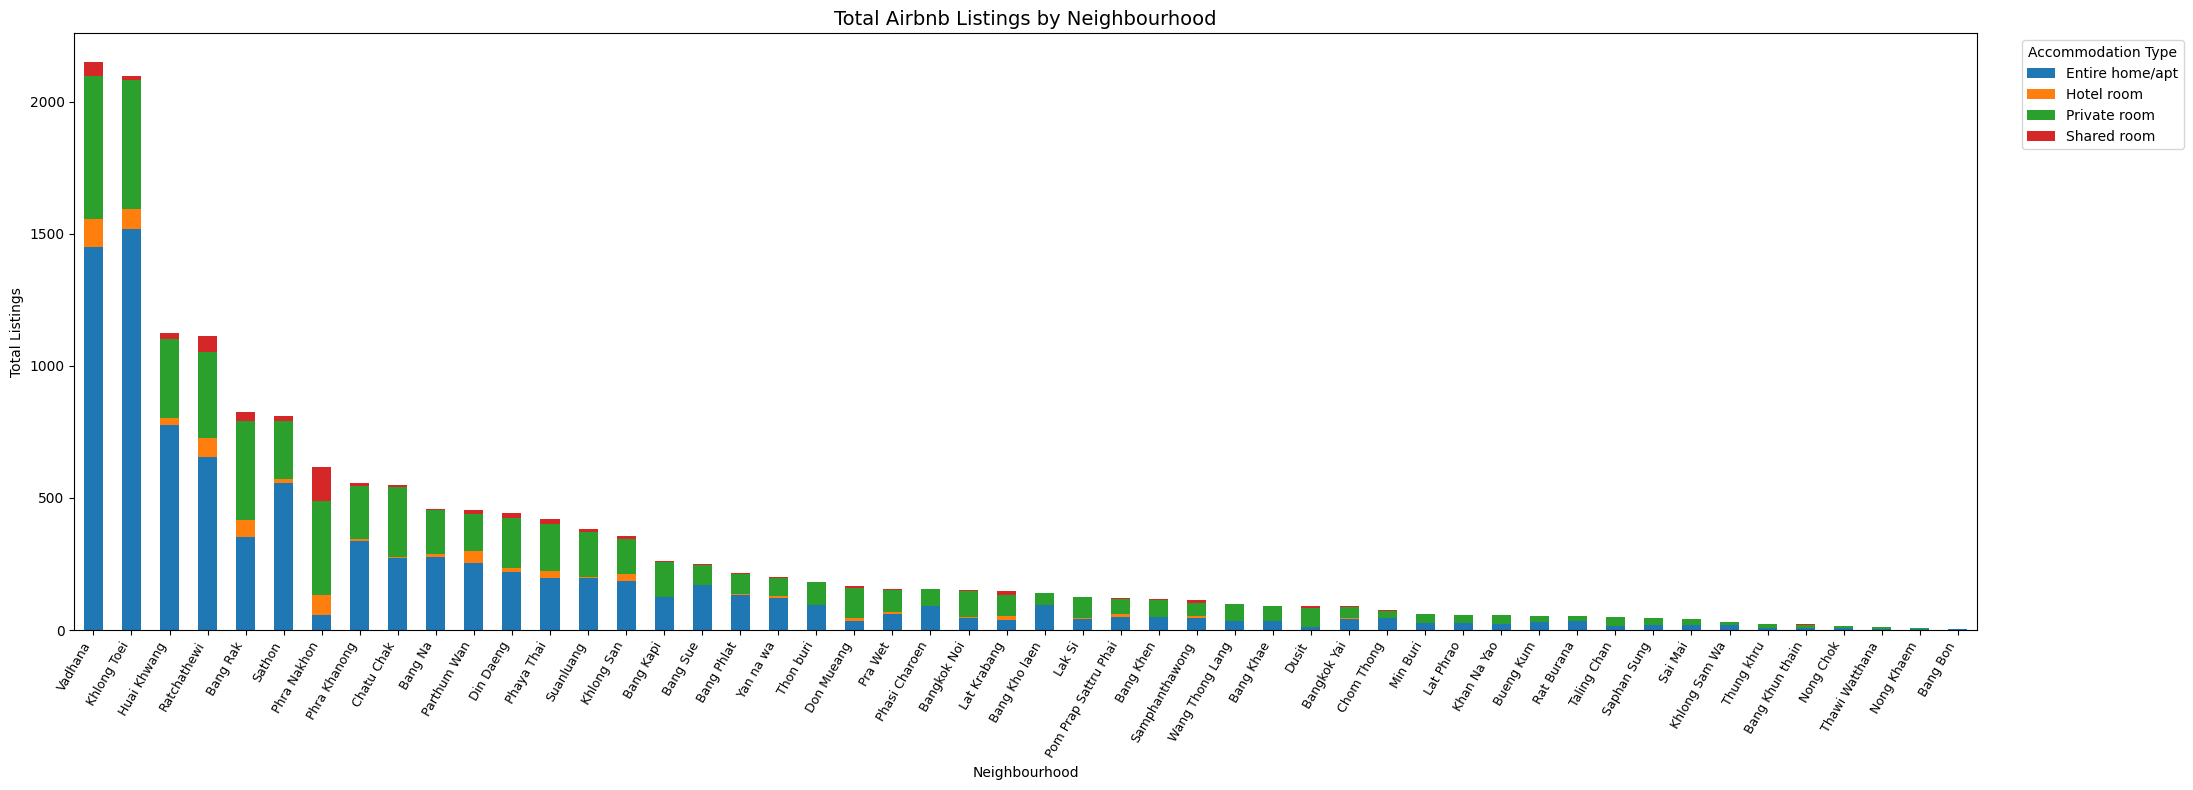

In [69]:
count_neigh_room = (
    df.groupby(["neighbourhood", "room_type"])
    .size()
    .reset_index(name="total_listings")
)

order_neigh = (
    df.groupby("neighbourhood")
    .size()
    .sort_values(ascending=False)
    .index
)

pivot_count = count_neigh_room.pivot(
    index="neighbourhood",
    columns="room_type",
    values="total_listings"
).fillna(0)

pivot_count["total"] = pivot_count.sum(axis=1)

pivot_count = pivot_count.sort_values(
    by="total",
    ascending=False
)

pivot_count = pivot_count.drop(columns="total")

plt.figure(figsize=(22, 8))

pivot_count.plot(
    kind="bar",
    stacked=True,
    ax=plt.gca()
)

plt.title(
    "Total Airbnb Listings by Neighbourhood",
    fontsize=14
)
plt.xlabel("Neighbourhood")
plt.ylabel("Total Listings")
plt.xticks(rotation=60, ha="right", fontsize=9)
plt.legend(
    title="Accommodation Type",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)
plt.tight_layout()
plt.show()



This chart shows the distribution of room types per neighborhood. Areas closer to the city centre tend to have a higher proportion of entire homes/apartments being rented out, as well as the higher presence of hotel rooms and shared rooms. This segment of the market is more suited for guests with higher budget. Both proximity to central business areas, privacy and exclusivity is a factor in increasing the listing price

In contrast, areas with a lower density of listings tend to favor private rooms more than entire homes and apartment units. These are more suited to solo/duo guests with a lower budget.   

To supplement the information above, two more pieces of information are required. They are are the median prices for each accomodation type (for all neighborhoods) as well as the average rental duration per neighborhood.

In [70]:
price_summary_room_type = (
    df.groupby("room_type")["price"]
    .agg(
        average_price="mean",
        median_price="median",
        count="count"
    )
    .sort_values("average_price", ascending=False)
)

price_summary_room_type


,average_price,median_price,count
room_type,,,
Entire home/apt,3465.474529,1536.0,8912
Private room,3064.603640,1212.0,5770
Hotel room,3032.983025,1700.0,648
Shared room,919.757170,500.0,523


Due to the presence of outliers, average price is still an unreliable measure of central tendency to be used fto illustrate the price difference between each room types. Using the median as a standard, we can conclude that: 

Hotel room > Entire home/apt > Private room > Shared room.

Below is the median rental duration per neighborhood, sorted from highest to lowest.

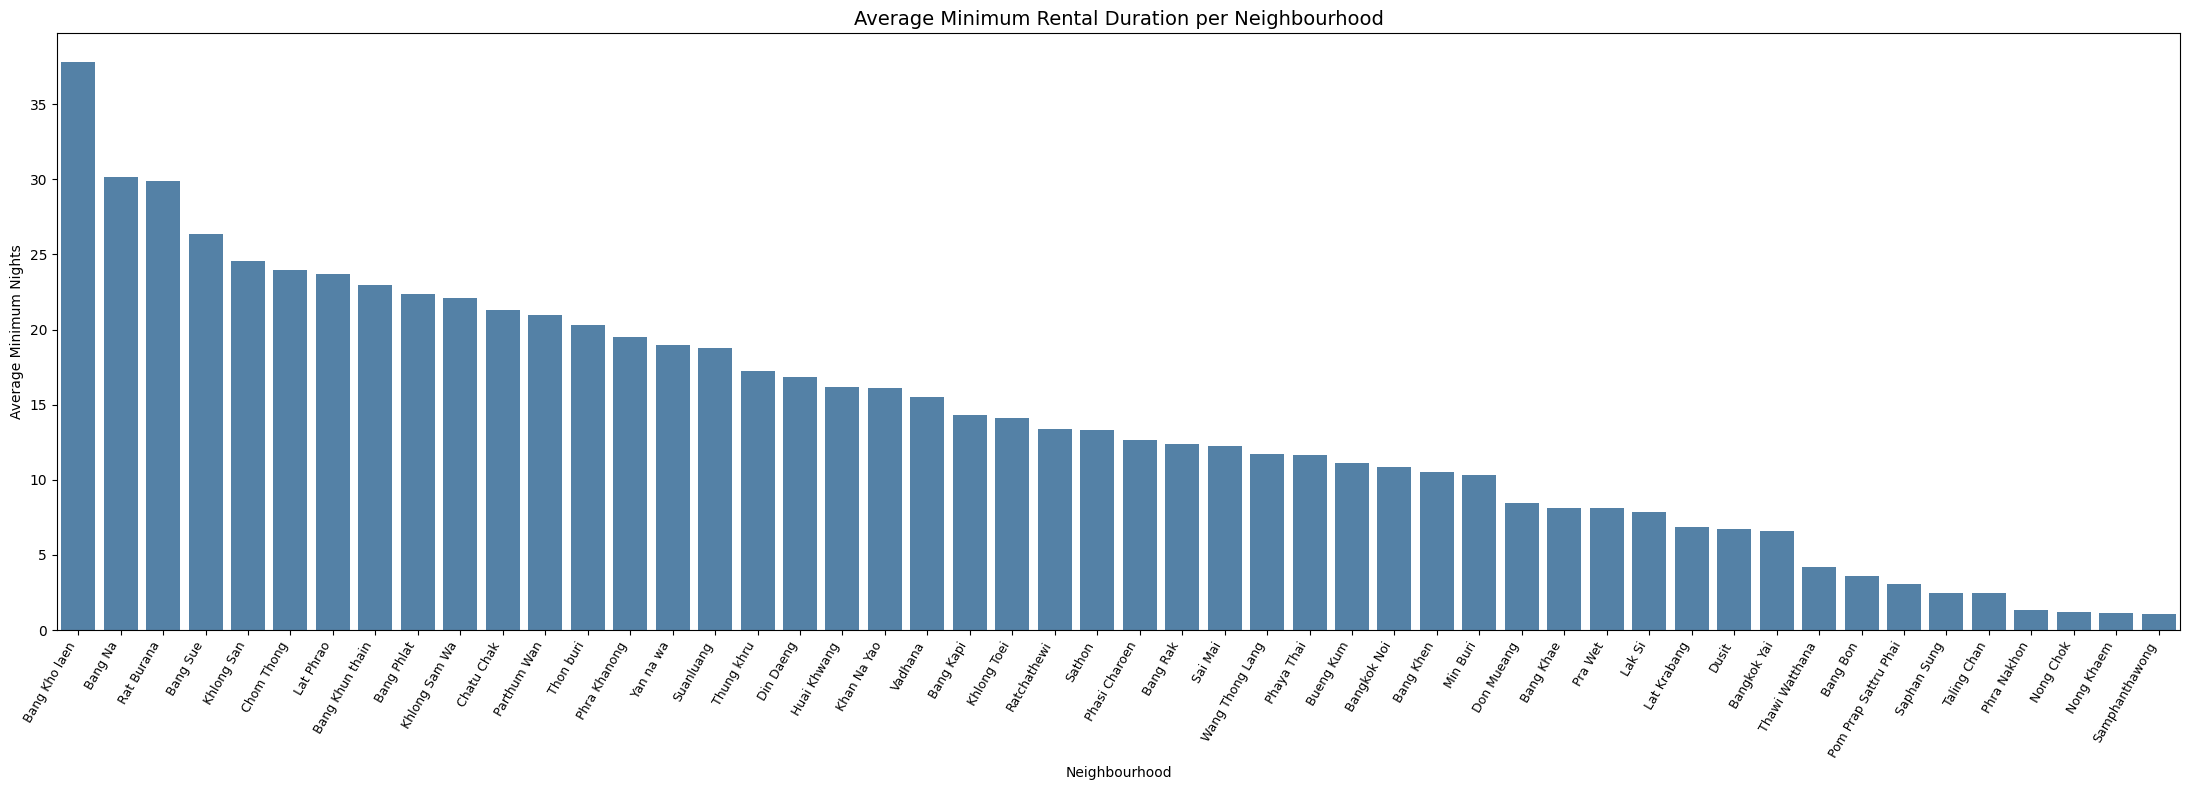

In [71]:
avg_rental_duration = (
    df.groupby("neighbourhood")["minimum_nights"]
    .mean()
    .sort_values(ascending=False)
)

avg_rental_duration_df = avg_rental_duration.reset_index()
avg_rental_duration_df.columns = ["neighbourhood", "avg_minimum_nights"]


plt.figure(figsize=(22, 8))

sns.barplot(
    data=avg_rental_duration_df,
    x="neighbourhood",
    y="avg_minimum_nights",
    color="steelblue"
)

plt.title("Average Minimum Rental Duration per Neighbourhood", fontsize=14)
plt.xlabel("Neighbourhood")
plt.ylabel("Average Minimum Nights")
plt.xticks(rotation=60, ha="right", fontsize=9)
plt.tight_layout()
plt.show()

The bar chart above sorts the average rental duration per neighborhood. Upon comparing the locations of each neighborhood to the map above, we can conclude that areas closer to the city centre (high-density) tend to prefer short-term stays, whereas areas farther from the centre(low-density) favor long-term stays

### Section 1 Conclusion and Recommendations

Based on the data analysis performed above, several key takeaways can be obtained regarding the potential pricing strategy with respect to different neighborhood locations and accomodation types. 

1) Listing prices are highly influenced by location. The closer the location is to the city centre, the higher the prices will be. This confirms that the neighborhood location to be the main factor in influencing the listing price. However, this parttern is not observed in the Nong Chok area, which has a high listing price despite its faraway location from the city centre. Upon investigation, this particular area is close to the Bangkok Arena, which contributes to its pricing. 

2) Type of accomodation is also an influencing factor for listing prices. Guests that value more private, spacious and luxurious accomodations are willing to pay more, as shown by the higher prices of hotel rooms and entire homes/apartments. In contrast, guests on a lower budget will prefer places with a lower price point (such as shared rooms).

3) Areas with a higher number of accomodation listings are saturated, which means competition will be tougher. In contrasts, areas with a lower number of listings provide an easier competition and more stable pricing. The types of prevalent accomodation differs depending on density as well.

4) Rental duration increases the farther the listing is from the central area. 

Recommendation: 

- High risk, high reward approach: Start an accomodation in the densely populated areas closer to the city center, prioritizing short-term stays (Hotels and Private houses/apartment.) This approach is favorable if you have a lot of starting capital, leaning more towards rental companies. 

- Lower risk, stable approach: Rent out an accomodation in the low-density areas. You can either target the segment of smaller-group guests with a lower budget (Single room), or larger groups with a lower budget (Private house/Apartments)

- Rent out shared accomodation for guests who wish to stay somewhere closer to the city centre but has a lower budget.



### **Section 2. Are there any seasonal or event-related pricing patterns that can be leveraged to increase revenue?**

In this section, we will investigate the monthly trend of average rental prices to investigate whether there is a link between booking dates and the price at which the accomodation is rented out. As the booking date information is not available in this dataset, we will use **last_review** as our date reference. The data was converted to datetime format earlier, which is crucial in our analysis.

There were numerous missing review data in the original dataset. We used a placeholder date to recitfy the error, but for the purpose of this analysis, we will exclude the missing data entirely. 

In [72]:
df_clean = df[df["last_review"] != pd.Timestamp("1900-01-01")]
df_clean.shape

(10064, 14)

Now that all the outliers have been expunged, we will proceed to plot the average of price per month. Make sure that the last_review data has been converted to datetime format. 

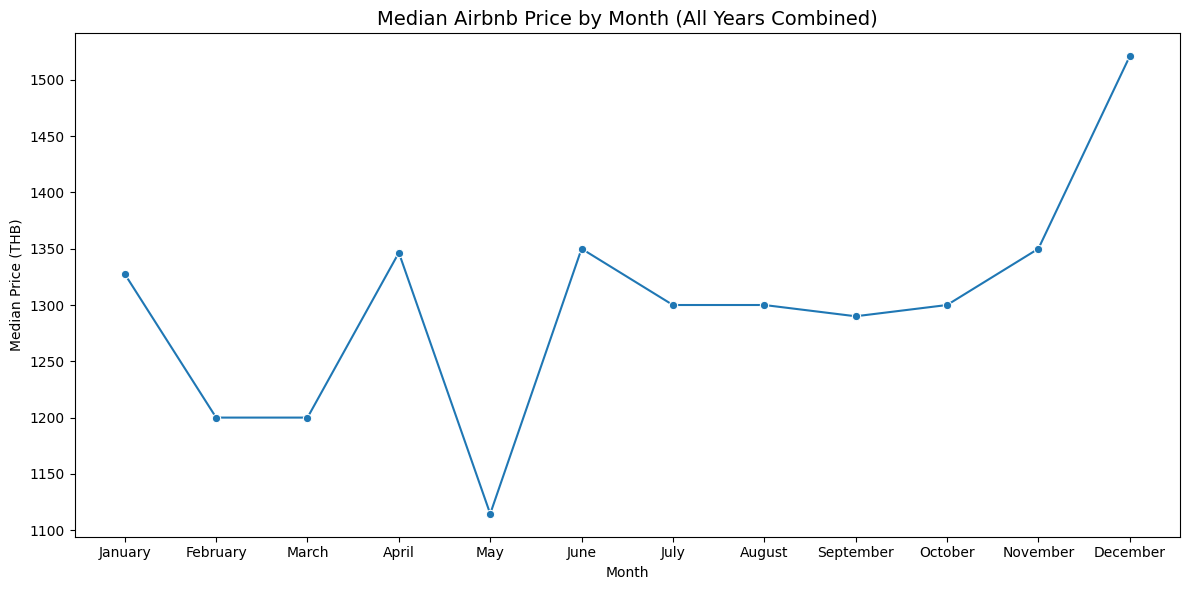

In [73]:
df_clean["last_review"] = pd.to_datetime(df_clean["last_review"])

#Create month column

df_clean["month"] = df_clean["last_review"].dt.month
df_clean["month_name"] = df_clean["last_review"].dt.month_name()


#Average price per month calculation

avg_price_by_month = (
    df_clean.groupby(["month", "month_name"])["price"]
    .median()
    .reset_index()
    .sort_values("month")
)
# Plot graph

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=avg_price_by_month,
    x="month_name",
    y="price",
    marker="o"
)

plt.title("Median Airbnb Price by Month (All Years Combined)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Median Price (THB)")
plt.tight_layout()
plt.show()

The graph above illustrate the average price fluctuations per month for every year combined. Prices tend to peak during November and December. These peaks indicate the main tourist seasons for the city of Bangkok, which contributes highly to the soaring prices. 

While this reflects the seasonal data for each month, this does not give the full picture. We would need to plot the yearly trend as well to investigate if there are any notable patterns. 

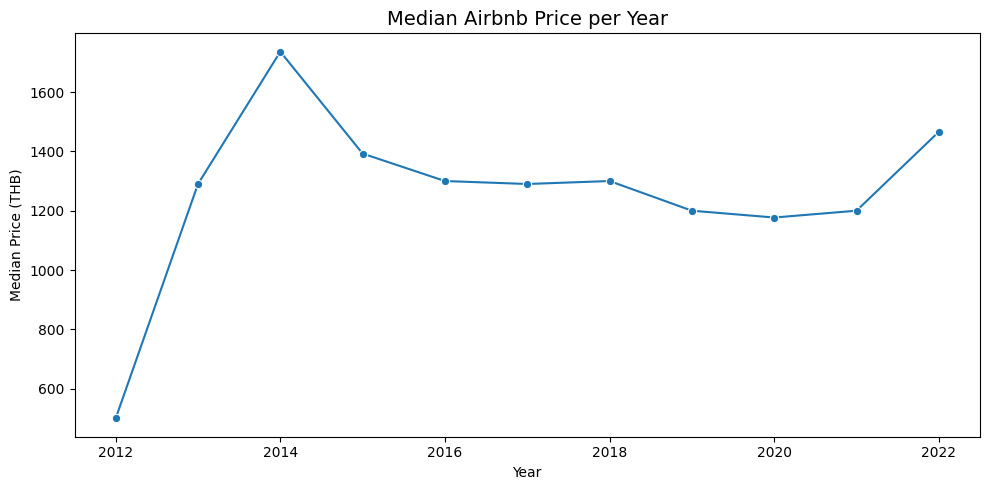

In [74]:
df_clean["year"] = df_clean["last_review"].dt.year

#Yearly Price Average
avg_price_by_year = (
    df_clean.groupby("year")["price"]
    .median()
    .reset_index()
)

avg_price_by_year = avg_price_by_year.sort_values("year")

plt.figure(figsize=(10, 5))

sns.lineplot(
    data=avg_price_by_year,
    x="year",
    y="price",
    marker="o"
)

plt.title("Median Airbnb Price per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Median Price (THB)")
plt.tight_layout()
plt.show()

As shown above, the price generally increases from 2012 to 2014, reaching its highest ever peak. The price then stays consistent until the year 2020. However, average price falls down after 2020, which is a direct result of the Covid-19 pandemic restricting travel for domestic and international visitors. Fortunately, the price picks up again after the year 2022, at which the restrictions started to ease up.


### **Section 3. Can we adjust the minimum night requirement dynamically to maximize occupancy without sacrificing revenue?**

In this section, we would like to explore the relationship between minimum stay duration and certain metrics such as pricing, occupancy and number of reviews. This analysis will provide insight on how the minimum stay duration will affect the aformentioned key parameters, which will assist in developing a strategy in fine-tuning stay durations to maximize revenue and booking numbers. 

First, we will plot the stay duration against booking prices. Since there is a huge variance of minimum stay duration data, the relationship is better represented using bar chart with certain data bins for minimum stay periods.  

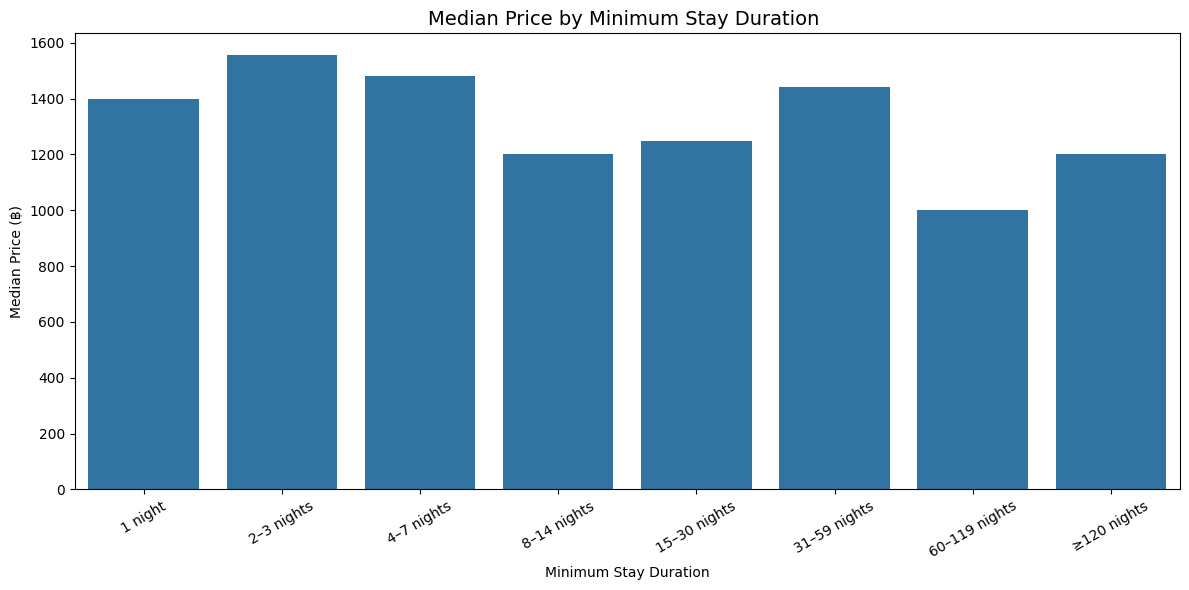

In [75]:
# Define bins and labels
bins = [0, 1, 3, 7, 14, 30, 59, 119, df_clean["minimum_nights"].max()]
labels = [
    "1 night",
    "2–3 nights",
    "4–7 nights",
    "8–14 nights",
    "15–30 nights",
    "31–59 nights",
    "60–119 nights",
    "≥120 nights"
]

df_clean["min_stay_bin"] = pd.cut(
    df_clean["minimum_nights"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

bin_price = (
    df_clean
    .groupby("min_stay_bin", observed=True)["price"]
    .median()
    .reset_index()
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=bin_price,
    x="min_stay_bin",
    y="price"
)

plt.title("Median Price by Minimum Stay Duration ", fontsize=14)
plt.xlabel("Minimum Stay Duration")
plt.ylabel("Median Price (฿)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

As shown in the plot above, median price per minimum stay duration seems to peak at 2-3 nights for short-term accomodation and 31-59 nights for a longer-term accomodation. These stay durations are promising enough to be optimum lengths for revenue maximization. However, we need to investigate the other side of the equation in order to get a full picture. 

 Now, let us investigate the relationship between the minimum stay duration and **availability_365**, which indicates the annual occupancy of the room. As always, we will use the median availability since the data contains a high number of outliers.





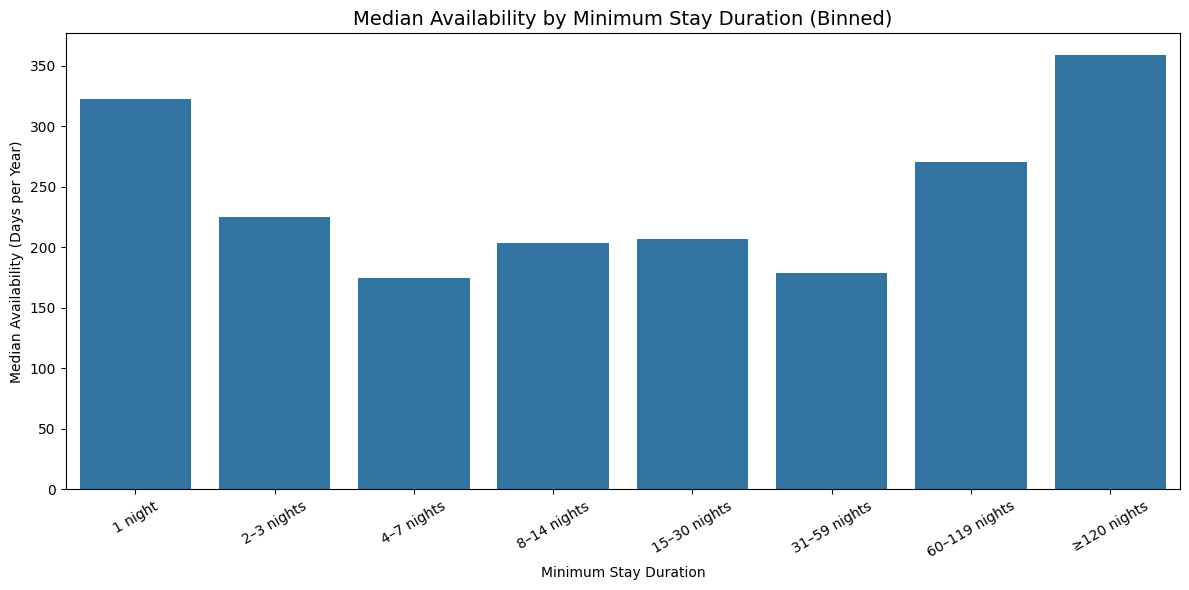

In [76]:
bins = [0, 1, 3, 7, 14, 30, 59, 119, df_clean["minimum_nights"].max()]
labels = [
    "1 night",
    "2–3 nights",
    "4–7 nights",
    "8–14 nights",
    "15–30 nights",
    "31–59 nights",
    "60–119 nights",
    "≥120 nights"
]

df_clean["min_stay_bin"] = pd.cut(
    df_clean["minimum_nights"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

bin_availability = (
    df_clean
    .groupby("min_stay_bin", observed=True)["availability_365"]
    .median()
    .reset_index()
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=bin_availability,
    x="min_stay_bin",
    y="availability_365"
)

plt.title("Median Availability by Minimum Stay Duration (Binned)", fontsize=14)
plt.xlabel("Minimum Stay Duration")
plt.ylabel("Median Availability (Days per Year)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



From the plot above, we could surmise that the minimum stay duration with the least availability (highest demand) are situated between 2-60 nights. Highest room booking numbers for short-term stays happen between 4-7 days, whereas for medium-long stays happen between 31 to 59 nights. 

We are starting to get a clearer picture on how to optimize the minimum booking time from both the pricing and room availability. For our final analysis, we will compare the stay duration with **number_of_reviews**, which cound be used as an indicator of the number of people who completed their booking of said accomodation.   

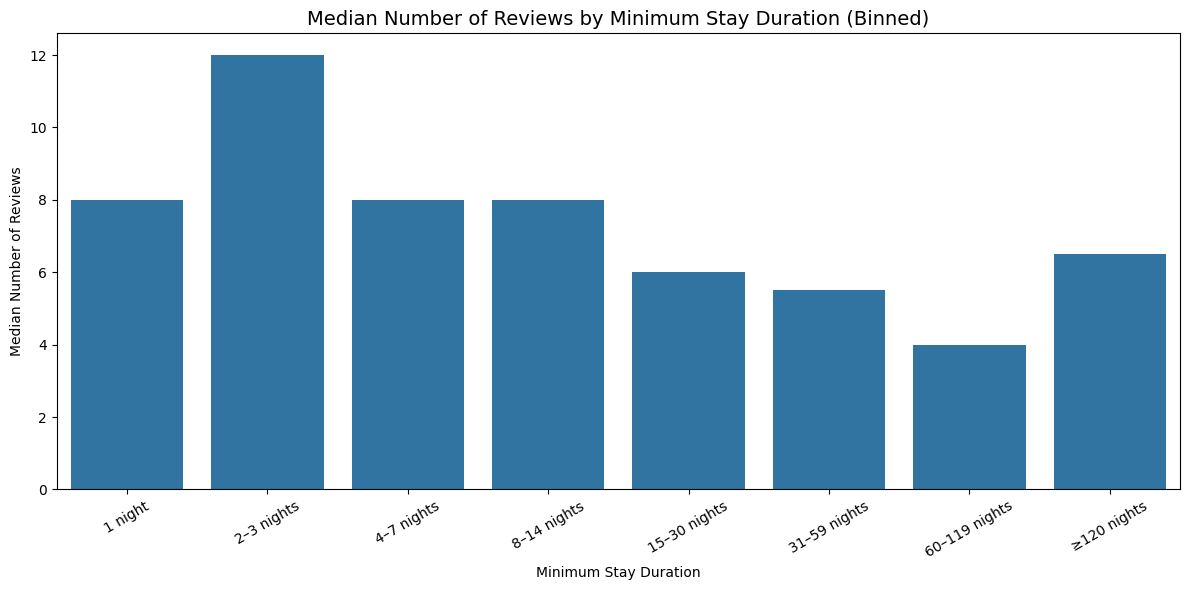

In [77]:
#Same bins as previous analysis
bins = [0, 1, 3, 7, 14, 30, 59, 119, df_clean["minimum_nights"].max()]
labels = [
    "1 night",
    "2–3 nights",
    "4–7 nights",
    "8–14 nights",
    "15–30 nights",
    "31–59 nights",
    "60–119 nights",
    "≥120 nights"
]

df_clean["min_stay_bin"] = pd.cut(
    df_clean["minimum_nights"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

bin_reviews = (
    df_clean
    .groupby("min_stay_bin", observed=True)["number_of_reviews"]
    .median()
    .reset_index()
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=bin_reviews,
    x="min_stay_bin",
    y="number_of_reviews"
)

plt.title("Median Number of Reviews by Minimum Stay Duration (Binned)", fontsize=14)
plt.xlabel("Minimum Stay Duration")
plt.ylabel("Median Number of Reviews")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

As per the plot above, The minimum duration stay of 2-3 nights have the highest popularity among customers, as shown by the median number of reviews for that data bin. Customers tend to leave more reviews for shorter duration of stays compared to longer stay durations. This corresponds to the higher number of check in/outs for shorter stay durations as compared to longer ones. 


### Section 3: Conclusion and Recommendation

Here are the main takeaways that can be obtained from the three graphs above. 

1) Median price is higher for short-term stays at under a week, followed by a medium term stay at 31-59 days. These two strategies are viable for high pricing. 

2) The highest occupancy for accomodation happens at the stay duration of 4-7 days and 31-59 days. These two values also correspond to short and medium-term stays. 

3) The number of reviews tend to be higher at shorter-term stays, indicating a high guest turnover rate.

4) At a long-term stay duration (>120 days), both price and occupancy is lower than the shorter durations, but customers have a stronger impression on their stay, which urged them to leave more reviews. 

With these in mind, we can propose two main strategies.

- Short term stay: Anywhere between 2 days min to 7 days. This has a higher profit and higher turnover. However, it highly depends on factors that influence the number of guests booking such as seasonality.
- Medium-term stay: Anywhere between 31-59 days minimum. The price and demand for this minimum stay duration is high enough to be profitable. It also provides a more steady stream of income compared to short-term stay. 

These strategies coincide with the ones investigated in Section 1, where guests staying closer to the city centre prefer shorter stays, whereas guests coming to areas further from the city centre prefer longer stays. 

### **Section 4. Are there any specific features for which guests are willing to pay a premium?**

Based on the analysis we conducted so far, there are a few features that contribute towards customers paying a premium (higher price). 

1) Type of accomodation matters. Prices for entire homes/apartments are consistently higher than single rooms or shared accomodations for all neighborhoods. This indicates that guests value privacy enough that they would pay more to get it. This trend can also be observed in the high price of hotel rooms in the central areas. 

2) Location matters highly for pricing. Accomodations that are located near the city centre with all its tourist attractions, or even tourist attrations far away from the centre all have consistently higher prices than accomodations located in the suburbs. This suggests that proximity to attractions, transportation, and economic activity is a premium feature in itself. Guests value convenience and accessibility, and this is reflected in higher willingness to pay.

3) Prices tend to be higher for places that are more flexible for short-time stay durations. We have observed that places that allow guests to stay for a shorter period of time elicit more demand in guests, leading to a higher median price. People are eager to pay for for flexibility. 

4) Aailability patterns and booking frequency indirectly signal premium features. Listings with lower annual availability and higher numbers of reviews tend have higher prices, suggesting that well-performing listings with strong demand can sustain higher prices. This creates an impression that well-reviewed and highly booked places contains premium qualities that are highly desirable by customers. 

In summary, guests are willing to pay a premium for privacy, central location, flexibility in stay duration, and listings that signal quality and high demand. These features consistently emerge as pricing drivers across neighbourhood, accommodation type, and booking behavior analyses.

## Conclusions and Recommendations

### **Conclusions**

This analysis examined Airbnb listings through multiple dimensions including price, neighbourhood, accommodation type, minimum stay duration, availability, and booking activity proxied by reviews. Several consistent and interrelated patterns emerged.

- Location is the dominant factor influencing price differences. Neighbourhoods with central locations, tourism appeal, or business activity consistently exhibit higher median and average prices compared to non-central or residential areas. This confirms that accessibility and proximity to demand centers represent a strong pricing premium.

- Accommodation type plays an important role in pricing. Entire homes or apartments have the highest prices across nearly all neighbourhoods, indicating strong guest willingness to pay for privacy and exclusive use. Hotel rooms also achieve relatively high prices in select central areas, while private and shared rooms remain positioned as lower-priced, budget-oriented options.

- Price distributions are non-normal and heavily skewed, with significant outliers driven by premium listings. As a result, median prices provide a more reliable benchmark for typical market behavior than averages. This pattern holds consistently across neighbourhood, accommodation type, and minimum stay analyses.

- Minimum stay duration reflects distinct hosting strategies. Listings with short minimum stays are associated with higher booking frequency, more reviews, and lower annual availability, indicating a short-term, high-turnover model. In contrast, listings with long minimum stay requirements show higher availability and fewer reviews, reflecting a long-term rental strategy with lower turnover but greater stability.

- Availability and demand are closely linked to pricing strategy. Listings with lower availability and higher review counts tend to be priced affordably to maximize occupancy, while higher-priced listings often experience lower booking frequency but compensate through higher revenue per stay. 

- Seasonal trends indicate that both price and demand vary over time. Monthly and yearly trend analyses show recurring seasonal patterns,peaking during the holiday season on November - December. This suggests that dynamic pricing is necessary to capture peak demand while remaining competitive during off-peak periods.

Overall, Airbnb pricing is shaped by the interaction of location, accommodation type, stay flexibility, and competitive intensity rather than any single factor in isolation.

### **Recommendations**

1. March Pricing Strategy with Neighbourhood Areas

Hosts in high-demand, central neighbourhoods should maintain a higher price and avoid underpricing. In contrast, hosts in non-central areas should prioritize lower pricing and higher occupancy rather than aggressive price maximization.

2. Match Accommodation Type to Market Positioning

Entire homes or apartments are best positioned as premium options, particularly in central or tourist-oriented neighbourhoods. Private and shared rooms should focus on affordability and longer stays, while hotel-style listings should emphasize premium service quality and convenience for shorter stays. 

3. Optimize Minimum Stay Requirements Strategically

Short minimum stays are effective in high-demand areas where booking frequency is high and turnover costs can be offset by higher prices. Longer minimum stays are more suitable for residential areas or hosts targeting long-term guests, where stability and reduced turnover are priorities.

4. Adjust Pricing Dynamically Based on Seasonality

Hosts should incorporate seasonal patterns into pricing strategies by increasing prices during high-demand months and offering lower rates or discounts during low-demand periods. 

5. Differentiate in High-Competition Neighbourhoods

In areas with high listing density, hosts should implement flexible minimum stay durations, high-quality listing advertisments, and added luxury services. Competitive advantage in such markets depends less on location and more on customer satisfaction and accomodation quality.

In [78]:
#konversi data ke csv
df_clean.to_csv("airbnb_bangkok_clean.csv", index=False)
